In [1]:
import polars as pl
import pandas as pd

In [2]:
data_df = pd.read_parquet("data/data.parquet")
ukazatel = data_df.loc[data_df["kodukaz"] == 10000]
rocniky = ukazatel["rok"].unique()
print(min(list(rocniky)))

2000


## datové matice ukazatelů v letech

In [3]:
df = pl.read_parquet("data/data.parquet")
ukazatele = pl.read_csv("data/cis_ukazatelu.csv")
uzemi = pl.read_csv("data/cis_uzemi.csv")
df.head()

rok,kodukaz,koduzemi,hodnota
i32,i32,i32,f32
2021,10000,500011,0.0
2021,10000,500020,0.0
2021,10000,500046,0.0
2021,10000,500062,0.0
2021,10000,500071,0.0


In [4]:
uzemi_enum = df["koduzemi"].unique()
matrix_alluzemi = df.pivot(values="hodnota", index=("rok", "koduzemi"), columns="kodukaz", aggregate_function=None).lazy()
matrices = {}
matrixes_uzemi = pl.collect_all([matrix_alluzemi.filter(pl.col("koduzemi") == uzemi) for uzemi in uzemi_enum])
len(matrixes_uzemi)

6272

In [5]:
matrixes_uzemi[0]

rok,koduzemi,10000,10300,10350,10360,10370,10380,10390,10391,40300,40310,40320,40331,40400,40410,40420,40500,40510,40520,40540,40550,40560,40570,40580,40590,40731,40733,40735,40737,40741,40743,40745,40747,40751,40753,40755,…,402505,402602,402604,402605,402606,110960,140800,250100,250110,250120,250130,250140,250150,250160,250170,250180,250190,250200,250210,250220,250230,250240,250250,250260,250270,250280,250290,250300,250310,250320,250330,250340,250350,250360,250370,250380,250390
i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2021,500011,0.0,1602.589355,1.0,1.0,1.0,0.0,0.0,2.0,1.0,103.0,4.0,7.6,1.0,20.0,1.0,1.0,358.0,18.0,0.0,0.0,0.0,10.7,13.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,500011,0.0,1602.589355,1.0,1.0,1.0,0.0,0.0,2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,102.0,4.0,7.6,0.0,0.0,0.0,1.0,325.0,18.0,0.0,0.0,0.0,11.9,13.5,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,79.0,3.0,5.8,0.0,0.0,0.0,1.0,337.0,17.0,0.0,0.0,0.0,9.4,14.2,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,81.0,3.0,6.0,0.0,0.0,0.0,1.0,321.0,17.0,0.0,0.0,0.0,9.7,13.6,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2017,500011,0.0,1602.588867,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,301.0,16.0,0.0,0.0,0.0,10.7,11.3,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2016,500011,0.0,1602.588867,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,285.0,15.0,0.0,0.0,0.0,9.0,9.5,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2015,500011,0.0,1602.576416,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,272.0,14.0,0.0,0.0,0.0,8.8,9.3,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2014,500011,0.0,1602.576416,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,259.0,12.0,0.0,0.0,0.0,8.0,7.8,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [6]:
matrixes_uzemi = {m.lazy().select(pl.col("koduzemi")).head(1).collect()[0, 0]: m.drop("koduzemi") for m in matrixes_uzemi}
matrixes_uzemi.keys()

dict_keys([500011, 500020, 500046, 500062, 500071, 500101, 500127, 500135, 500151, 500160, 500194, 500259, 500291, 500496, 500526, 500623, 500801, 500852, 500861, 500879, 501476, 501646, 501751, 501794, 501841, 502146, 502235, 502405, 502545, 502839, 503142, 503304, 503410, 503444, 503622, 503657, 503738, 503916, 503941, 504246, 504301, 504441, 504505, 504785, 504807, 504921, 504955, 505005, 505013, 505030, 505081, 505099, 505111, 505145, 505161, 505188, 505218, 505269, 505293, 505366, 505391, 505501, 505528, 505587, 505609, 505650, 505668, 505781, 505862, 505927, 506192, 506214, 506320, 506451, 506460, 506486, 506494, 506621, 506664, 506699, 506702, 506711, 506729, 506737, 506753, 506761, 506770, 507016, 507091, 507105, 507113, 507181, 507237, 507261, 507270, 507334, 507377, 507423, 507458, 507504, 507547, 507580, 507610, 507628, 507644, 507652, 507695, 507717, 507733, 507784, 507920, 507971, 508004, 508128, 508144, 508152, 508357, 508373, 508501, 508683, 509078, 509108, 509116, 50914

In [7]:
import plotly.express as px
import plotly.graph_objects as go

uzemiId = 500011
matrix = matrixes_uzemi[uzemiId].to_pandas()
uzemi_nazev = uzemi.filter(pl.col("koduzemi") == uzemiId).get_column("obec")[0]
ukazatel = 10300
ukazatel_nazev = ukazatele.filter(pl.col("kodukaz") == ukazatel).select("nazev").to_pandas()["nazev"][0]
px.line(matrix, x="rok", y=str(ukazatel), title=f"{uzemi_nazev}: {ukazatel_nazev}")

## Fit data with polynomial

In [17]:

import numpy as np

x = matrix["rok"]
y = matrix[str(ukazatel)]
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], list(x)[-1], len(x))
y_new = f(x_new)


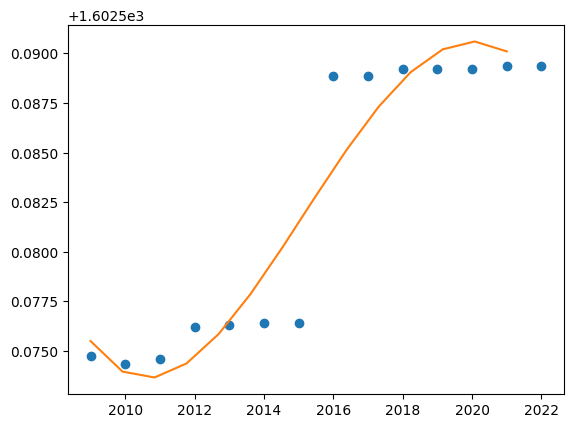

In [13]:

import matplotlib.pyplot as plt
plt.plot(x,y,'o', x_new, y_new)
# plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

## forward fill data

In [29]:
topic = pl.from_pandas(matrix[["rok", str(ukazatel)]])
topic

rok,10300
i32,f32
2021,1602.589355
2022,1602.589355
2020,1602.589233
2019,1602.589233
2018,1602.589233
2017,1602.588867
2016,1602.588867
2015,1602.576416
2014,1602.576416
